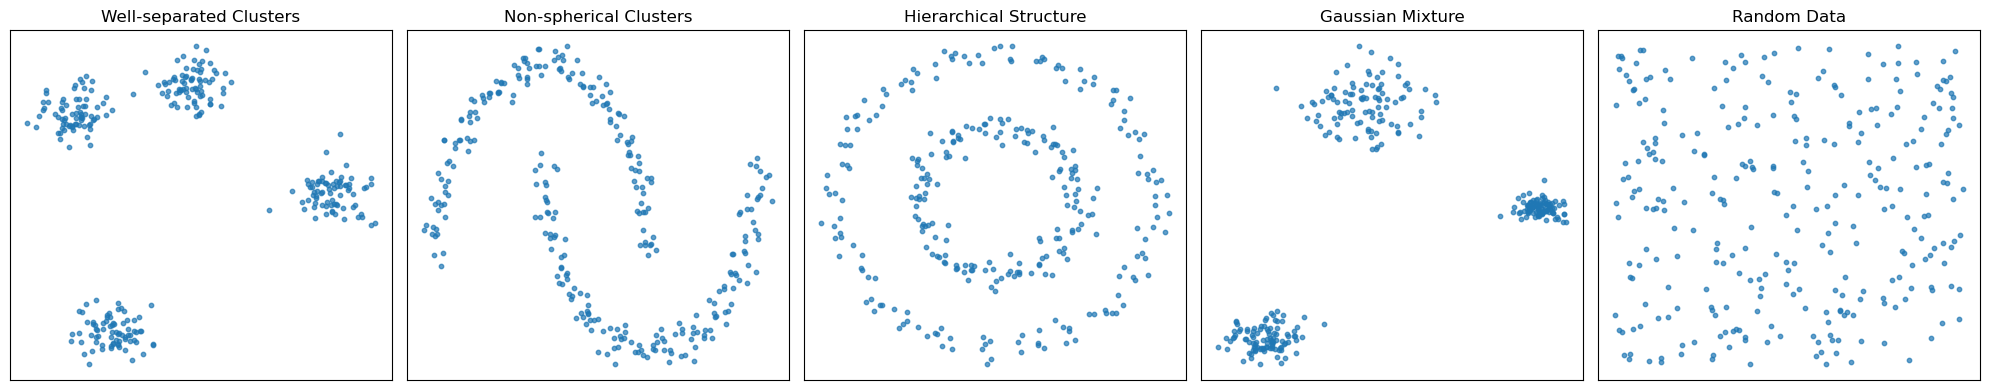

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist

# Set random seed for reproducibility
np.random.seed(42)

# 1. Well-separated spherical clusters (Ideal for K-Means & GMM)
X_blobs, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# 2. Non-spherical clusters (Better for DBSCAN & Spectral Clustering)
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# 3. Hierarchical structure (Best for Agglomerative Clustering)
X_circles, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# 4. Gaussian mixture data (Ideal for GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
X_gaussian, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.5, 0.5, 0.8], random_state=42)

# 5. No real clusters (random data, Hopkins should be low)
X_random = np.random.uniform(-5, 5, (300, 2))

# Plot the datasets
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
datasets = [X_blobs, X_moons, X_circles, X_gaussian, X_random]
titles = ["Well-separated Clusters", "Non-spherical Clusters", "Hierarchical Structure",
          "Gaussian Mixture", "Random Data"]

for i, ax in enumerate(axes):
    ax.scatter(datasets[i][:, 0], datasets[i][:, 1], s=10, alpha=0.7)
    ax.set_title(titles[i])
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


In [20]:
# Function to compute Hopkins Statistic
def hopkins_statistic(X, sample_size=50):
    from sklearn.utils import resample

    n = len(X)  
    sample_size = min(sample_size, n)  
    X_sample = resample(X, n_samples=sample_size, random_state=42)  
    
    nn = NearestNeighbors(n_neighbors=2).fit(X)  
    distances_X = nn.kneighbors(X_sample, 2, return_distance=True)[0][:,1]  
    
    X_random = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), (sample_size, X.shape[1]))  
    distances_random = nn.kneighbors(X_random, 1, return_distance=True)[0].ravel()  

    return np.sum(distances_random) / (np.sum(distances_random) + np.sum(distances_X))

# Compute Hopkins Statistic for each dataset
hopkins_scores = {titles[i]: hopkins_statistic(datasets[i]) for i in range(5)}
hopkins_scores


{'Well-separated Clusters': 0.9038928507553657,
 'Non-spherical Clusters': 0.8357834248041298,
 'Hierarchical Structure': 0.7323262436565469,
 'Gaussian Mixture': 0.9124159139301412,
 'Random Data': 0.5257527954823334}

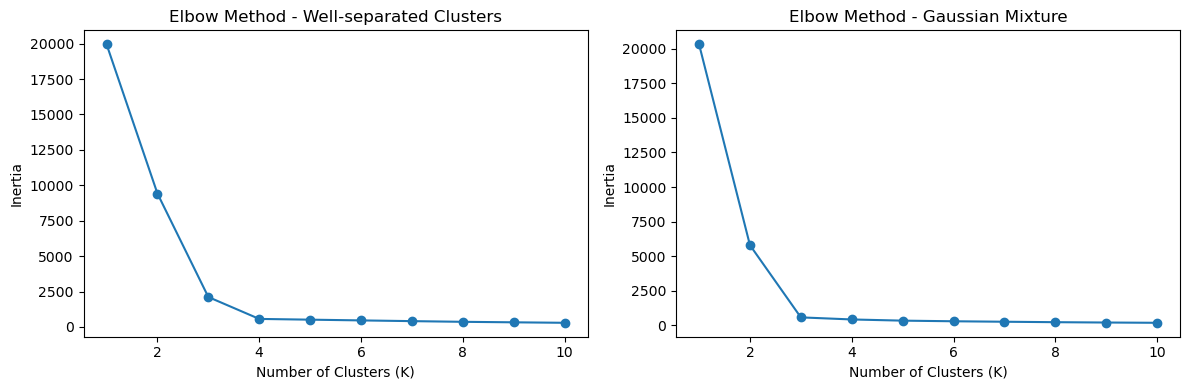

In [21]:
# Function to compute Elbow Method (Inertia) for K-Means
def elbow_method(X, max_k=10):
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    return inertia

# Compute Elbow Method for well-separated clusters and Gaussian mixture (since K-Means is good for them)
elbow_well_separated = elbow_method(X_blobs)
elbow_gaussian = elbow_method(X_gaussian)

# Plot Elbow Method results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(range(1, 11), elbow_well_separated, marker='o', linestyle='-')
ax[0].set_title("Elbow Method - Well-separated Clusters")
ax[0].set_xlabel("Number of Clusters (K)")
ax[0].set_ylabel("Inertia")

ax[1].plot(range(1, 11), elbow_gaussian, marker='o', linestyle='-')
ax[1].set_title("Elbow Method - Gaussian Mixture")
ax[1].set_xlabel("Number of Clusters (K)")
ax[1].set_ylabel("Inertia")

plt.tight_layout()
plt.show()


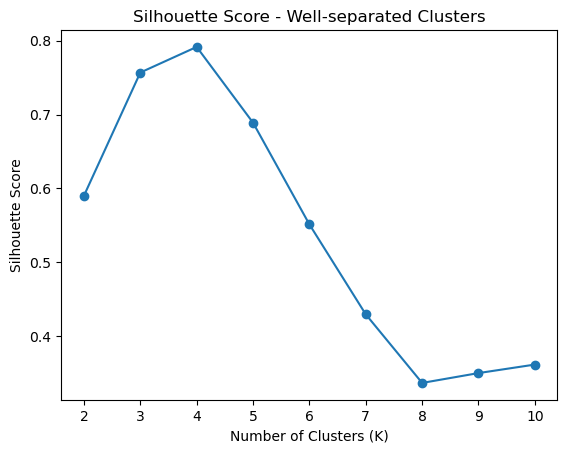

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

def silhouette_analysis(X, max_k=10):
    scores = []
    for k in range(2, max_k + 1):  # Silhouette score requires at least 2 clusters
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
    return scores

# Example usage with your dataset (replace X_blobs with your actual data)
silhouette_well_separated = silhouette_analysis(X_blobs)

# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_well_separated, marker='o', linestyle='-')
plt.title("Silhouette Score - Well-separated Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


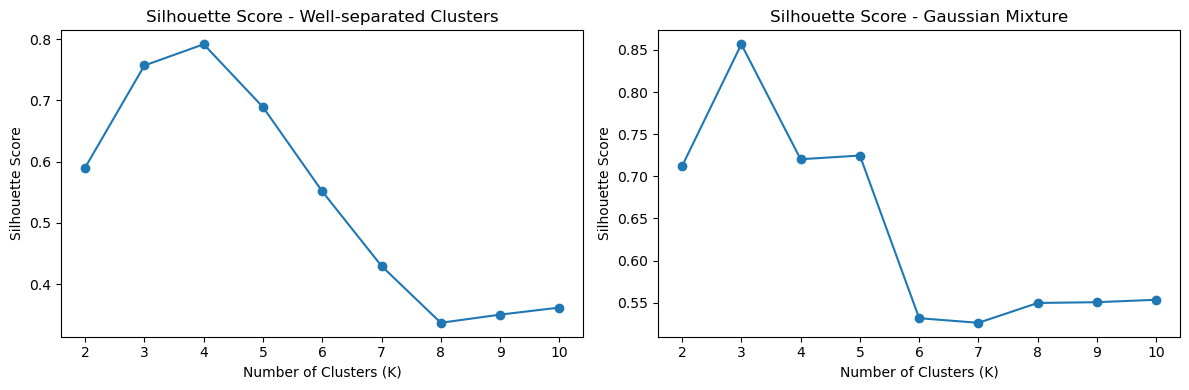

In [23]:
# Function to compute Silhouette Scores for different values of K
def silhouette_analysis(X, max_k=10):
    scores = []
    for k in range(2, max_k + 1):  # Silhouette score requires at least 2 clusters
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
    return scores

# Compute Silhouette Scores for well-separated clusters and Gaussian mixture
silhouette_well_separated = silhouette_analysis(X_blobs)
silhouette_gaussian = silhouette_analysis(X_gaussian)

# Plot Silhouette Scores
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(range(2, 11), silhouette_well_separated, marker='o', linestyle='-')
ax[0].set_title("Silhouette Score - Well-separated Clusters")
ax[0].set_xlabel("Number of Clusters (K)")
ax[0].set_ylabel("Silhouette Score")

ax[1].plot(range(2, 11), silhouette_gaussian, marker='o', linestyle='-')
ax[1].set_title("Silhouette Score - Gaussian Mixture")
ax[1].set_xlabel("Number of Clusters (K)")
ax[1].set_ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


In [1]:
# CREATE THE DATASET

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Define battery types and their typical compositions
battery_types = {
    'EV_NMC811': {'Li': [8, 10], 'Co': [2, 3], 'Ni': [14, 17], 'Mn': [2, 3], 'energy_density': [250, 300]},
    'EV_NMC622': {'Li': [7, 9], 'Co': [5, 7], 'Ni': [10, 12], 'Mn': [4, 6], 'energy_density': [200, 250]},
    'EV_LFP': {'Li': [10, 12], 'Co': [0, 0.5], 'Ni': [0, 0.5], 'Mn': [0, 0.5], 'energy_density': [160, 180]},
    'Consumer_NMC': {'Li': [6, 8], 'Co': [6, 8], 'Ni': [6, 8], 'Mn': [6, 8], 'energy_density': [180, 220]},
    'Consumer_LCO': {'Li': [5, 7], 'Co': [12, 15], 'Ni': [0, 0.5], 'Mn': [0, 0.5], 'energy_density': [150, 200]},
    'Industrial_LMO': {'Li': [6, 8], 'Co': [0, 1], 'Ni': [0, 1], 'Mn': [10, 13], 'energy_density': [120, 150]}
}

# Generate dataset
num_samples = 500
data = []

for i in range(num_samples):
    # Randomly select battery type
    b_type = np.random.choice(list(battery_types.keys()))
    specs = battery_types[b_type]
    
    # Generate battery age and usage (correlated)
    age = np.random.uniform(0.5, 10)  # 6 months to 10 years
    max_cycles = 3000 - 200 * age  # Newer batteries have more potential cycles
    cycles_used = np.random.uniform(0, min(max_cycles, 2500))
    
    # Calculate degradation factor (affects recovery rates)
    degradation = (age * 0.05) + (cycles_used / 10000)
    degradation = min(0.7, degradation)  # Cap at 70% degradation
    
    # Generate base composition with random variation within type ranges
    li_content = np.random.uniform(specs['Li'][0], specs['Li'][1])
    co_content = np.random.uniform(specs['Co'][0], specs['Co'][1])
    ni_content = np.random.uniform(specs['Ni'][0], specs['Ni'][1])
    mn_content = np.random.uniform(specs['Mn'][0], specs['Mn'][1])
    energy_density = np.random.uniform(specs['energy_density'][0], specs['energy_density'][1])
    
    # Generate recycling process parameters
    # Temperature affects recovery but has energy cost tradeoff
    recycle_temp = np.random.uniform(40, 90)  # Celsius
    
    # Process time also affects recovery efficiency
    recycle_time = np.random.uniform(2, 8)  # Hours
    
    # Recovery rates depend on composition, degradation, and process parameters
    # Higher temperatures and longer times generally improve recovery
    temp_factor = (recycle_temp - 40) / 50  # Normalize to 0-1
    time_factor = (recycle_time - 2) / 6    # Normalize to 0-1
    
    # Base recovery rates
    li_recovery_base = 0.75 + (0.2 * temp_factor) + (0.1 * time_factor)
    co_recovery_base = 0.85 + (0.12 * temp_factor) + (0.08 * time_factor)
    ni_recovery_base = 0.82 + (0.15 * temp_factor) + (0.08 * time_factor)
    mn_recovery_base = 0.78 + (0.18 * temp_factor) + (0.09 * time_factor)
    
    # Adjust for degradation
    li_recovery = li_recovery_base * (1 - degradation * 0.5) * np.random.uniform(0.95, 1.05)
    co_recovery = co_recovery_base * (1 - degradation * 0.3) * np.random.uniform(0.95, 1.05)
    ni_recovery = ni_recovery_base * (1 - degradation * 0.4) * np.random.uniform(0.95, 1.05)
    mn_recovery = mn_recovery_base * (1 - degradation * 0.3) * np.random.uniform(0.95, 1.05)
    
    # Cap recovery rates at 98%
    li_recovery = min(0.98, li_recovery)
    co_recovery = min(0.98, co_recovery)
    ni_recovery = min(0.98, ni_recovery)
    mn_recovery = min(0.98, mn_recovery)
    
    # Energy consumption (kWh) increases with temperature and time
    energy_consumed = 15 + (recycle_temp * 0.5) + (recycle_time * 3) + np.random.uniform(-5, 5)
    
    # Process cost (€) depends on energy and time
    labor_cost = recycle_time * 25  # €/hour labor cost
    energy_cost = energy_consumed * 0.25  # €/kWh
    chemical_cost = 15 + (5 * recycle_time)  # Base cost plus per hour
    process_cost = labor_cost + energy_cost + chemical_cost + np.random.uniform(-10, 10)
    
    # Material value recovered (€)
    li_value = li_content * li_recovery * 35  # €/kg lithium value
    co_value = co_content * co_recovery * 45  # €/kg cobalt value
    ni_value = ni_content * ni_recovery * 20  # €/kg nickel value
    mn_value = mn_content * mn_recovery * 3   # €/kg manganese value
    total_value = li_value + co_value + ni_value + mn_value
    
    # Net profit
    profit_margin = (total_value - process_cost) / process_cost
    
    data.append({
        'battery_id': i + 1000,
        'battery_type': b_type,
        'lithium_content': li_content,
        'cobalt_content': co_content,
        'nickel_content': ni_content,
        'manganese_content': mn_content,
        'age_years': age,
        'charge_cycles': cycles_used,
        'energy_density': energy_density,
        'recycling_temp': recycle_temp,
        'recycling_time': recycle_time,
        'lithium_recovery_rate': li_recovery,
        'cobalt_recovery_rate': co_recovery,
        'nickel_recovery_rate': ni_recovery,
        'manganese_recovery_rate': mn_recovery,
        'energy_consumed': energy_consumed,
        'process_cost': process_cost,
        'materials_value': total_value,
        'profit_margin': profit_margin
    })

# Create DataFrame
df = pd.DataFrame(data)


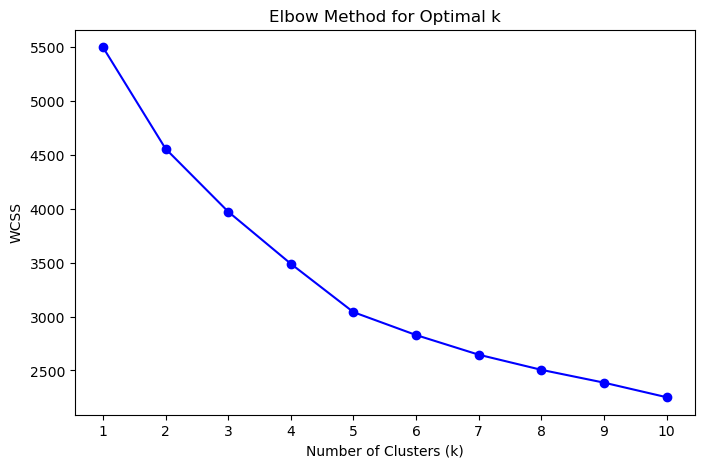

In [2]:
# Basic clustering analysis

# Select input and output features for clustering
features = ['lithium_content', 'cobalt_content', 'nickel_content', 'manganese_content', 
            'age_years', 'charge_cycles', 'recycling_temp', 'recycling_time',
            'lithium_recovery_rate', 'cobalt_recovery_rate', 'profit_margin']

# Create feature matrix
X = df[features].copy()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to perform K-means clustering
#def perform_kmeans(X, n_clusters=4):
#    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
#    clusters = kmeans.fit_predict(X)
#    return clusters, kmeans

## GENERATE ELBOW CURVE
# Range of k values to test
k_values = range(1, 11)

# Store WCSS for each k
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # WCSS

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.show()


In [31]:
# Cluster Analysis based on this elbow graph

cluster_values = [5, 6, 7, 8]
kmeans_models = {}

for k in cluster_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    kmeans_models[k] = kmeans  # Store the model

    # Print inertia (WCSS) for reference
    print(f"For k = {k}:")
    print(f"Inertia (WCSS): {kmeans.inertia_:.4f}\n")

    # Convert cluster centers to DataFrame for better readability
    df_centers = pd.DataFrame(kmeans.cluster_centers_, columns=[f'Feature {i+1}' for i in range(X_scaled.shape[1])])
    
    print("Cluster Centers:")
    print(df_centers.round(4))
    print("-" * 50)  
    
    #display(f'For k = {k}:')
    #display(f'Inertia (WCSS): {kmeans.inertia_:.4f}')
    #display(f'Cluster Centers:\n{kmeans.cluster_centers_, 4}\n')

For k = 5:
Inertia (WCSS): 3041.1908

Cluster Centers:
   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0    -0.5694    -0.9886    -0.9084     1.7786    -0.1912     0.0846   
1    -1.1216     1.8338    -0.9624    -1.0639     0.1649     0.0465   
2    -0.0293     0.0291     0.8418     0.1215     0.4602    -0.1189   
3     1.8199    -1.0606    -0.9622    -1.0580     0.1014     0.0168   
4     0.0324     0.0100     0.8639     0.1038    -0.6783     0.0555   

   Feature 7  Feature 8  Feature 9  Feature 10  Feature 11  
0    -0.1370    -0.0272    -0.0069      0.0193     -1.1337  
1    -0.0947     0.0753    -0.1672     -0.1440      0.6191  
2    -0.3129    -0.3796    -0.6231     -0.6349      0.5310  
3    -0.0779     0.0666    -0.1314     -0.0725     -0.9078  
4     0.6402     0.4299     1.0579      0.9984      0.2309  
--------------------------------------------------
For k = 6:
Inertia (WCSS): 2828.5749

Cluster Centers:
   Feature 1  Feature 2  Feature 3  Feature 4 

'Cluster Summary:'

,lithium_recovery_rate,cobalt_recovery_rate,profit_margin,process_cost,materials_value,lithium_content,cobalt_content,nickel_content,manganese_content
cluster,,,,,,,,,
0,0.730856,0.844310,0.802011,183.199016,295.857820,10.992273,0.256238,0.263321,0.254918
1,0.829288,0.907761,1.945456,202.907053,560.445507,7.830396,4.095953,8.533534,6.343818
2,0.691167,0.813653,2.303800,160.802107,486.052866,7.667828,4.179159,8.613331,6.358023
3,0.729648,0.841796,2.961373,184.176114,672.701028,6.084108,13.523768,0.259189,0.229427


'\nBattery Type Distribution by Cluster (%):'

battery_type,Consumer_LCO,Consumer_NMC,EV_LFP,EV_NMC622,EV_NMC811,Industrial_LMO
cluster,,,,,,
0,0.0,0.0,100.0,0.0,0.0,0.0
1,0.7,21.4,0.7,31.0,22.8,23.4
2,0.0,28.4,0.0,23.4,25.4,22.8
3,100.0,0.0,0.0,0.0,0.0,0.0


,battery_id,battery_type,lithium_content,cobalt_content,nickel_content,manganese_content,age_years,charge_cycles,energy_density,recycling_temp,recycling_time,lithium_recovery_rate,cobalt_recovery_rate,nickel_recovery_rate,manganese_recovery_rate,energy_consumed,process_cost,materials_value,profit_margin
0,1000,Consumer_NMC,7.197317,6.312037,6.311989,6.116167,9.531786,800.539917,214.647046,70.055751,6.248435,0.646563,0.853643,0.776530,0.770152,65.591431,212.519012,517.503548,1.435093
1,1001,Consumer_NMC,6.046125,7.049549,6.799722,6.093331,6.310705,12.280242,218.950221,51.638567,2.543639,0.686047,0.791648,0.789307,0.748678,52.049603,107.927710,517.338786,3.793382
2,1002,EV_NMC811,9.931264,2.808397,14.913841,2.097672,1.117990,2372.213843,284.211651,62.007625,2.732229,0.725274,0.793578,0.823124,0.774542,55.825723,107.157535,602.784601,4.625219
3,1003,Industrial_LMO,6.062627,0.842285,0.449754,11.185451,2.475446,1419.250820,147.799766,76.363600,3.959245,0.810480,0.888452,0.893065,0.895161,67.532735,151.454365,243.723651,0.609222
4,1004,EV_NMC622,7.551998,5.592547,10.330534,4.031273,9.669925,647.107563,221.170074,59.744076,3.760929,0.592780,0.746246,0.719657,0.754453,57.214425,150.657495,502.300172,2.334054


'\nDataset Statistics:'

,battery_id,lithium_content,cobalt_content,nickel_content,manganese_content,age_years,charge_cycles,energy_density,recycling_temp,recycling_time,lithium_recovery_rate,cobalt_recovery_rate,nickel_recovery_rate,manganese_recovery_rate,energy_consumed,process_cost,materials_value,profit_margin
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,1249.50,7.95,5.12,5.95,4.42,5.15,915.84,197.70,65.27,4.98,0.74,0.85,0.81,0.82,62.68,180.25,510.08,2.08
std,144.48,1.67,4.59,5.92,3.94,2.73,600.65,46.16,14.68,1.72,0.08,0.06,0.07,0.07,9.74,53.01,175.36,1.42
min,1000.00,5.01,0.00,0.01,0.00,0.50,2.49,120.19,40.00,2.00,0.56,0.72,0.63,0.64,38.64,82.59,177.98,-0.25
25%,1124.75,6.68,0.63,0.32,0.38,2.89,433.16,164.83,53.50,3.49,0.68,0.81,0.76,0.77,55.58,133.68,311.56,1.08
50%,1249.50,7.65,5.32,6.39,4.09,4.99,857.39,191.72,65.30,5.02,0.74,0.85,0.80,0.82,63.26,179.95,572.12,1.94
75%,1374.25,8.85,7.09,10.98,7.01,7.52,1283.40,227.42,78.44,6.42,0.80,0.89,0.85,0.87,69.43,223.24,644.60,2.88
max,1499.00,11.96,14.98,16.96,12.95,9.99,2474.90,299.51,89.97,8.00,0.98,0.98,0.98,0.98,84.21,284.74,805.85,7.50


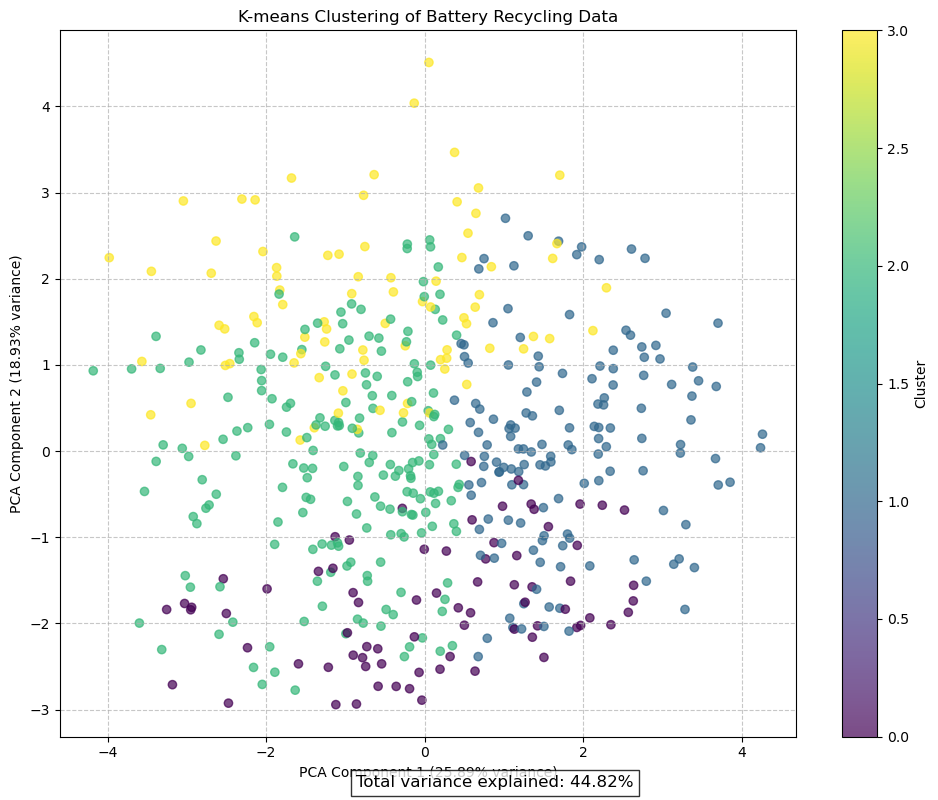

In [26]:


# Function to visualize clusters
def visualize_clusters(X, clusters, feature_names, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.title(title)
    plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Calculate variance explained by PC1 and PC2
    var_explained = pca.explained_variance_ratio_.sum()
    plt.figtext(0.5, 0.01, f'Total variance explained: {var_explained:.2%}', 
                ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    
    # Return PCA result for further analysis
    return X_pca, pca

def analyze_clusters(df, clusters):
    df_copy = df.copy()
    df_copy['cluster'] = clusters
    
    # Select only numeric columns for mean calculation
    numeric_columns = [
        'lithium_recovery_rate', 'cobalt_recovery_rate', 
        'profit_margin', 'process_cost', 'materials_value',
        'lithium_content', 'cobalt_content', 
        'nickel_content', 'manganese_content'
    ]
    
    # Calculate cluster summary for numeric columns
    cluster_summary = df_copy.groupby('cluster')[numeric_columns].mean()
    
    # Print key insights
    display("Cluster Summary:")
    display(cluster_summary)
    
    # Count battery types in each cluster
    type_distribution = pd.crosstab(df_copy['cluster'], df_copy['battery_type'], 
                                   normalize='index') * 100
    display("\nBattery Type Distribution by Cluster (%):")
    display(type_distribution.round(1))
    
    return cluster_summary, type_distribution

# Updated clustering workflow
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
clusters, kmeans_model = perform_kmeans(X_scaled, n_clusters=4)

# Visualize clusters
X_pca, pca = visualize_clusters(X_scaled, clusters, features, 'K-means Clustering of Battery Recycling Data')

# Analyze cluster characteristics
cluster_summary, type_distribution = analyze_clusters(df, clusters)

# Save dataset to CSV
df.to_csv('battery_recycling_dataset.csv', index=False)

# Print first few rows
display(df.head())

# Dataset stats
display("\nDataset Statistics:")
display(df.describe().round(2))

# Return the dataframe for use
df.to_csv('battery_recycling_dataset.csv', index=False)

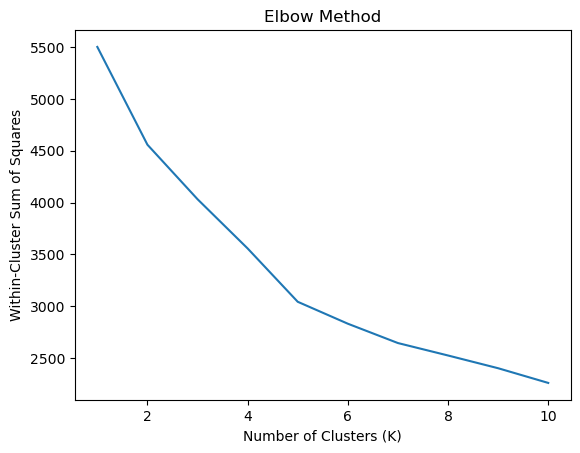

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate within-cluster sum of squares (WCSS) for different K values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

Cluster Characteristics:
        lithium_content           age_years           recycling_temp  \
                   mean       std      mean       std           mean   
Cluster                                                                
0              6.934105  0.621474  4.568985  2.502786      64.381467   
1              6.084108  0.560771  5.600815  2.616788      63.884135   
2              8.795275  1.472933  3.526264  2.135107      75.144580   
3              8.675108  1.558057  6.711384  2.441491      57.621516   

                                                         battery_type  \
               std                                           <lambda>   
Cluster                                                                 
0        14.016083  {'Industrial_LMO': 0.7684210526315789, 'Consum...   
1        13.788748                              {'Consumer_LCO': 1.0}   
2        12.327129  {'EV_NMC622': 0.34868421052631576, 'EV_LFP': 0...   
3        12.299104  {'EV_NMC811'

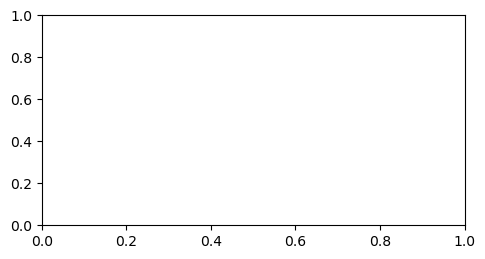

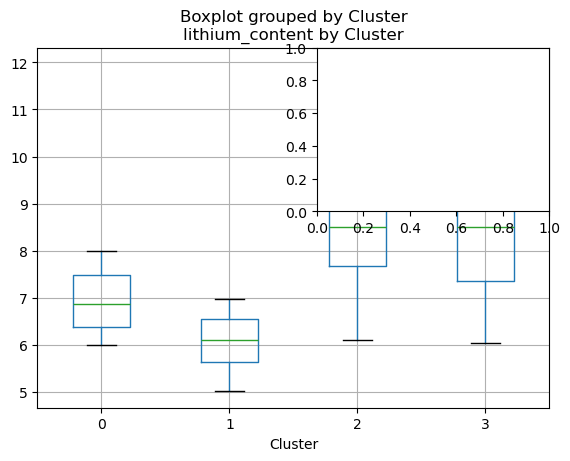

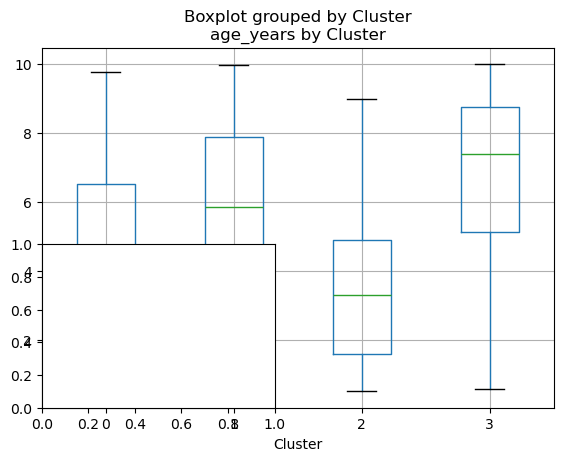

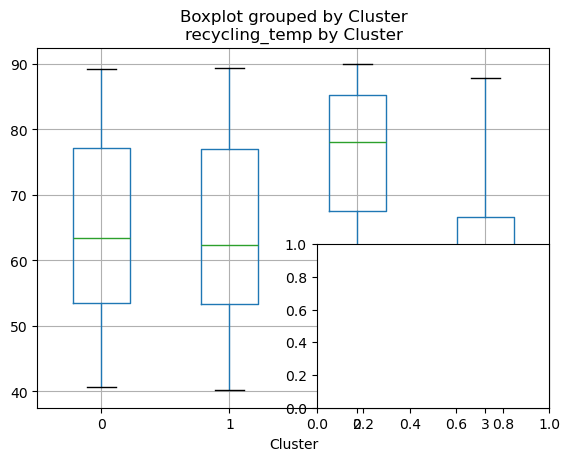

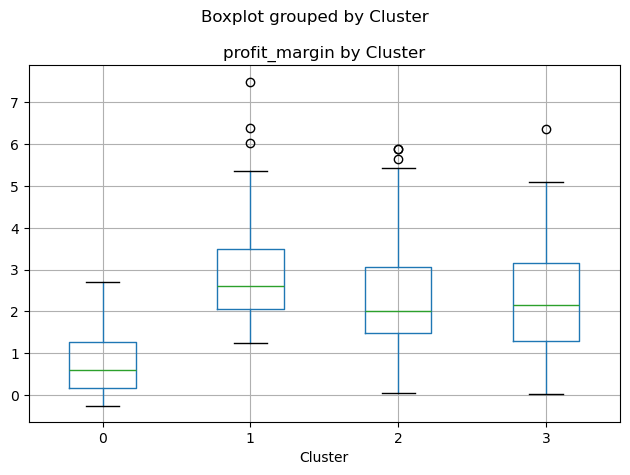

In [13]:
# After clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

# Analyze cluster characteristics
def interpret_clusters(df):
    # Aggregate key features by cluster
    cluster_summary = df.groupby('Cluster').agg({
        'lithium_content': ['mean', 'std'],
        'age_years': ['mean', 'std'],
        'recycling_temp': ['mean', 'std'],
        'battery_type': lambda x: x.value_counts(normalize=True).to_dict(),
        'profit_margin': ['mean', 'std']
    })
    
    print("Cluster Characteristics:")
    print(cluster_summary)
    
    # Visualize cluster differences
    plt.figure(figsize=(12, 6))
    
    # Box plot of key continuous variables
    key_features = ['lithium_content', 'age_years', 'recycling_temp', 'profit_margin']
    for i, feature in enumerate(key_features, 1):
        plt.subplot(2, 2, i)
        df.boxplot(column=feature, by='Cluster')
        plt.title(f'{feature} by Cluster')
    
    plt.tight_layout()
    plt.show()

# Call interpretation function
interpret_clusters(df)